### Data Scientists Salaries EDA

In this notebook, we are going to explore the data scientists salaries dataset downloaded from Kaggle:
https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data

### Columns Description

* work_year:	The year the salary was paid.
* experience_level: The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
* employment_type:	The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
* job_title:	The role worked in during the year.
* salary:	The total gross salary amount paid.
* salary_currency:	The currency of the salary paid as an ISO 4217 currency code.
* salary_in_usd:	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
* employee_residence:	Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio:	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50  Partially remote 100 Fully remote (more than 80%)
* company_location:	The country of the employer's main office or contracting branch as an ISO 3166 country code.
* company_size:	The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

### Let's start exploring the data!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('ds_salaries.csv',index_col=0)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
# check missing values

df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Let's check how many employees were employed in each year

In [6]:
yr=df['work_year'].value_counts()
yr

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

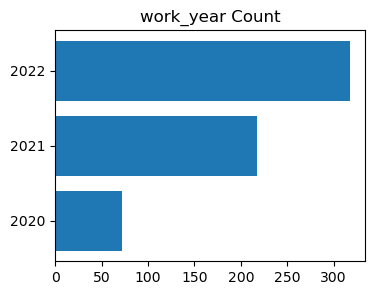

In [7]:
# visualize year count
plt.figure(figsize=(4,3))
plt.barh(yr.index,yr)
plt.title('work_year Count')
plt.yticks(list(yr.index));

The highest number of records belong to 2022, followed by 2021 then 2020

Let's view the distribution of experience level

In [8]:
exp=df['experience_level'].value_counts()
exp

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

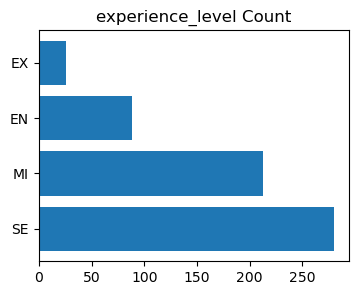

In [9]:
# visualize experience level count
plt.figure(figsize=(4,3))
plt.barh(exp.index,exp)
plt.title('experience_level Count')
plt.yticks(list(exp.index));

Seniors seem to be the highest population, executives are the lowest, which makes sense

In [10]:
# check the titles included in our data

df['job_title'].value_counts()

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

I'm going to focus on the top 3 titles (Data Scientist, Data Engineer, Data Analyst )

In [11]:
df['job_title'].value_counts()[:3]

job_title
Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: count, dtype: int64

In [12]:
# Select the data of the 3 titles only

data=df[(df['job_title']=='Data Scientist') | (df['job_title']=='Data Engineer') | (df['job_title']=='Data Analyst')]
data.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


For each title, I want to know the distribution of experience level given the below index:

EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

In [19]:
lvl=data.pivot_table(index='job_title', aggfunc='count', columns='experience_level').iloc[:,:4]
lvl.columns = lvl.columns.droplevel()
lvl

experience_level,EN,EX,MI,SE
job_title,,,,
Data Analyst,12.0,2.0,29.0,54.0
Data Engineer,12.0,4.0,53.0,63.0
Data Scientist,22.0,NaN,60.0,61.0


In [20]:
lvl['sum']=lvl.sum(axis=1, skipna=True)
lvl

experience_level,EN,EX,MI,SE,sum
job_title,,,,,
Data Analyst,12.0,2.0,29.0,54.0,97.0
Data Engineer,12.0,4.0,53.0,63.0,132.0
Data Scientist,22.0,NaN,60.0,61.0,143.0


In [21]:
# create a function that calculates the % of a column value out of the sum

def col_perc(df,col):
    return round(df[col]/df['sum'],2)

In [22]:
lvl['EN%']=col_perc(lvl, 'EN')
lvl['EX%']=col_perc(lvl, 'EX')
lvl['MI%']=col_perc(lvl, 'MI')
lvl['SE%']=col_perc(lvl, 'SE')
lvl.replace(np.nan,0,inplace=True)
lvl

experience_level,EN,EX,MI,SE,sum,EN%,EX%,MI%,SE%
job_title,,,,,,,,,
Data Analyst,12.0,2.0,29.0,54.0,97.0,0.12,0.02,0.30,0.56
Data Engineer,12.0,4.0,53.0,63.0,132.0,0.09,0.03,0.40,0.48
Data Scientist,22.0,0.0,60.0,61.0,143.0,0.15,0.00,0.42,0.43


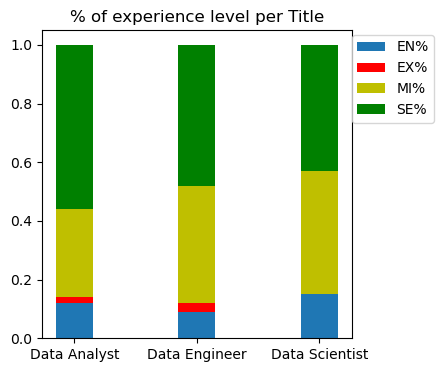

In [24]:
# let's visualize the %
plt.figure(figsize=(4,4))
y1=lvl.iloc[:,5]
y2=lvl.iloc[:,6]
y3=lvl.iloc[:,7]
y4=lvl.iloc[:,8]
plt.bar(x= lvl.index, height=y1, width=0.3)
plt.bar(x=lvl.index , height= y2, bottom=y1, color='r', width=0.3)
plt.bar(x= lvl.index , height=y3, bottom=y1+y2, color='y', width=0.3)
plt.bar(x= lvl.index , height=y4, bottom=y1+y2+y3, color='g', width=0.3)
plt.legend(lvl.columns[5:], loc=(1,0.7))
plt.title('% of experience level per Title');

For Data Scientists, it seems that the data doesn't include any executive level which might be weird, also the entry level here is higher than the other 2 titles.

In general, entry level % is low compared to the seniors and mid-level.

Let's explore the average salary for each of the 3 titles according to the company location

In [26]:
salary=data[['job_title','company_location','salary_in_usd','experience_level','employment_type']]
salary

,job_title,company_location,salary_in_usd,experience_level,employment_type
0,Data Scientist,DE,79833,MI,FT
5,Data Analyst,US,72000,EN,FT
7,Data Scientist,HU,35735,MI,FT
10,Data Scientist,FR,51321,EN,FT
11,Data Scientist,IN,40481,MI,FT
...,...,...,...,...,...
601,Data Analyst,CA,52000,EN,FT
602,Data Engineer,US,154000,SE,FT
603,Data Engineer,US,126000,SE,FT
604,Data Analyst,US,129000,SE,FT


In [27]:
# pivot the data 
sal=salary.pivot_table(index='company_location', values='salary_in_usd', columns='job_title', aggfunc=['mean','count'])
sal.replace(np.nan,0,inplace=True)

# create a new column with the number of records in each country, and sort descendingly
sal['total']=sal.iloc[:,3:].sum(axis=1)
sal.sort_values(by='total',ascending=False, inplace=True)
sal

mean                                      count  \
job_title          Data Analyst  Data Engineer Data Scientist Data Analyst   
company_location                                                             
US                107674.154930  139724.682353  143115.678571         71.0   
GB                 50875.600000   80305.750000   88177.363636          5.0   
CA                 81487.333333       0.000000   77787.000000          9.0   
DE                 63831.000000   58186.750000   69640.142857          1.0   
FR                 52930.500000   69143.000000   50085.571429          2.0   
IN                  6072.000000   26032.500000   26108.250000          1.0   
ES                 29098.000000   70070.500000   41136.666667          3.0   
GR                 32313.333333   65636.200000       0.000000          3.0   
AT                     0.000000   74130.000000   76352.000000          0.0   
TR                     0.000000   20059.500000   20171.000000          0.0   
PL                     0.000000   28476.000000   35590.000000          0.0   
NL                     0.000000   57566.000000       0.000000          0.0   
NG                 10000.000000       0.000000   50000.000000          1.0   
MX                     0.000000   33511.000000    2859.000000          0.0   
MT                     0.000000   28369.000000       0.000000          0.0   
PK                  8000.000000       0.000000       0.000000          1.0   
UA                     0.000000       0.000000   13400.000000          0.0   
MY                     0.000000       0.000000   40000.000000          0.0   
IR                     0.000000    4000.000000       0.000000          0.0   
LU                     0.000000       0.000000   62726.000000          0.0   
JP                     0.000000   41689.000000       0.000000          0.0   
IT                     0.000000       0.000000   21669.000000          0.0   
AU                     0.000000       0.000000   86703.000000          0.0   
IL                     0.000000       0.000000  119059.000000          0.0   
HU                     0.000000       0.000000   35735.000000          0.0   
DZ                     0.000000       0.000000  100000.000000          0.0   
CL                     0.000000       0.000000   40038.000000          0.0   
CH                     0.000000       0.000000  122346.000000          0.0   
BR                     0.000000       0.000000   12901.000000          0.0   
VN                     0.000000       0.000000    4000.000000          0.0   

                                               total  
job_title        Data Engineer Data Scientist         
company_location                                      
US                        85.0           84.0  240.0  
GB                        20.0           11.0   36.0  
CA                         0.0            5.0   14.0  
DE                         4.0            7.0   12.0  
FR                         2.0            7.0   11.0  
IN                         2.0            8.0   11.0  
ES                         4.0            3.0   10.0  
GR                         5.0            0.0    8.0  
AT                         1.0            2.0    3.0  
TR                         2.0            1.0    3.0  
PL                         1.0            1.0    2.0  
NL                         2.0            0.0    2.0  
NG                         0.0            1.0    2.0  
MX                         1.0            1.0    2.0  
MT                         1.0            0.0    1.0  
PK                         0.0            0.0    1.0  
UA                         0.0            1.0    1.0  
MY                         0.0            1.0    1.0  
IR                         1.0            0.0    1.0  
LU                         0.0            1.0    1.0  
JP                         1.0            0.0    1.0  
IT                         0.0            1.0    1.0  
AU                         0.0            1.0    1.0  
IL                    

Let's plot the distribution of salaries

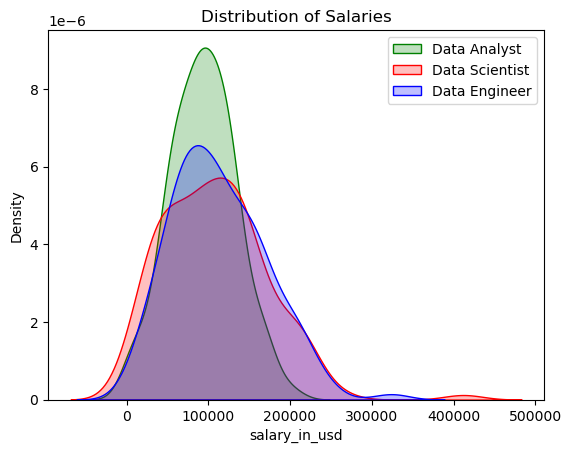

In [28]:
sns.kdeplot(data=data[data['job_title']=='Data Analyst'], x= 'salary_in_usd', label= 'Data Analyst',fill=True, color='g')
sns.kdeplot(data=data[data['job_title']=='Data Scientist'], x= 'salary_in_usd', label= 'Data Scientist',fill=True, color='r')
sns.kdeplot(data=data[data['job_title']=='Data Engineer'], x= 'salary_in_usd', label= 'Data Engineer',fill=True, color='b')
plt.title('Distribution of Salaries')
plt.legend();

It seems that Engineers & Scientists tend to have higher salaries than Analysts. Scientists also exceed Engineers in high ranges around 400,000 $

Now let's see the highest paying country for each of the 3 titles

In [29]:
# Highest paying country for Data Scientists

sal[sal[('mean','Data Scientist')]==sal[('mean','Data Scientist')].max()]

mean                                      count  \
job_title         Data Analyst  Data Engineer Data Scientist Data Analyst   
company_location                                                            
US                107674.15493  139724.682353  143115.678571         71.0   

                                               total  
job_title        Data Engineer Data Scientist         
company_location                                      
US                        85.0           84.0  240.0

In [30]:
# Highest paying country for Data Analysts

sal[sal[('mean','Data Analyst')]==sal[('mean','Data Analyst')].max()]

mean                                      count  \
job_title         Data Analyst  Data Engineer Data Scientist Data Analyst   
company_location                                                            
US                107674.15493  139724.682353  143115.678571         71.0   

                                               total  
job_title        Data Engineer Data Scientist         
company_location                                      
US                        85.0           84.0  240.0

In [31]:
# Highest paying country for Data Engineer

sal[sal[('mean','Data Engineer')]==sal[('mean','Data Engineer')].max()]

mean                                      count  \
job_title         Data Analyst  Data Engineer Data Scientist Data Analyst   
company_location                                                            
US                107674.15493  139724.682353  143115.678571         71.0   

                                               total  
job_title        Data Engineer Data Scientist         
company_location                                      
US                        85.0           84.0  240.0

It seems that USA has the highest average salaries for the 3 titles as well as the largest number of job opportunities. Let's explore the employee_residence for employees working in US located companies

In [32]:
us=data[data['company_location']=='US']
us.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


In [33]:
us.pivot_table(index='employee_residence',columns='job_title', aggfunc='count').iloc[:,:3].replace(np.nan,0)

company_location                             
job_title              Data Analyst Data Engineer Data Scientist
employee_residence                                              
BG                              1.0           0.0            0.0
BR                              0.0           0.0            1.0
CA                              0.0           0.0            1.0
ES                              0.0           1.0            0.0
GR                              0.0           0.0            1.0
IN                              0.0           0.0            1.0
IT                              0.0           1.0            0.0
PH                              0.0           0.0            1.0
RO                              0.0           1.0            0.0
RU                              0.0           0.0            1.0
US                             70.0          82.0           78.0

Apparently, the vast majority of employees of US companies reside in the US. Data scientist title has the highest number of employees working from outside the country.

Let's see the % of employees that reside in a country other than their company's country

In [34]:
expat=data[data['company_location']!=data['employee_residence']]
expat.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
32,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L


In [35]:
expat_prc=round(len(expat)*100/len(data),2)
"The % of employees that reside in a country other than their company's country is {}%".format(expat_prc)

"The % of employees that reside in a country other than their company's country is 5.11%"

Let's explore the average salary based on experience level

In [36]:
sal2=salary.pivot_table(index='job_title', aggfunc='mean',values='salary_in_usd', columns='experience_level')
sal2

experience_level,EN,EX,MI,SE
job_title,,,,
Data Analyst,53960.666667,120000.0,71699.206897,111922.629630
Data Engineer,58933.500000,245500.0,85985.660377,137035.841270
Data Scientist,55330.909091,NaN,82039.133333,152971.016393


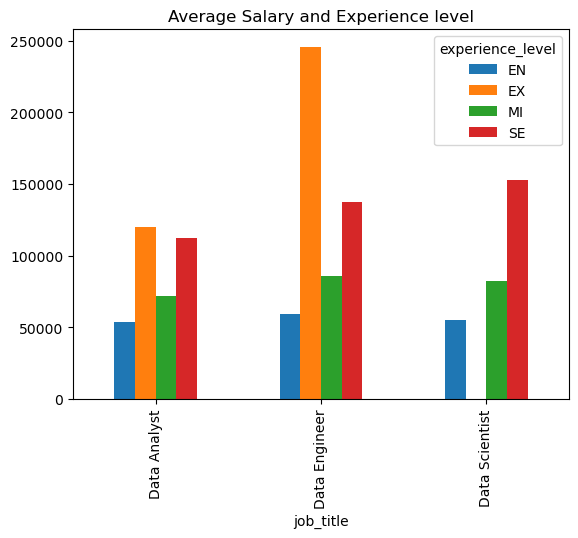

In [37]:
sal2.plot(kind='bar', stacked=False)
plt.title('Average Salary and Experience level');

The highest paying seems to be Data Engineers whose level is executives, followed by engineers & scientists with seniors level.
For entry level, the average salary is nearly similar across all titles.

let's see the count of employment types

In [38]:
data['employment_type'].value_counts()

employment_type
FT    365
PT      5
FL      2
Name: count, dtype: int64

It seems that part time and freeancer occurances are rare, the vast majority is full time.

Let's check the salary change according to employment type

In [39]:
sal3=salary.pivot_table(index='job_title', aggfunc='mean',values='salary_in_usd', columns='employment_type').replace(np.nan,0)
sal3

employment_type,FL,FT,PT
job_title,,,
Data Analyst,0.0,93752.843750,10354.0
Data Engineer,20000.0,114224.821705,62349.0
Data Scientist,100000.0,108922.792857,60834.5


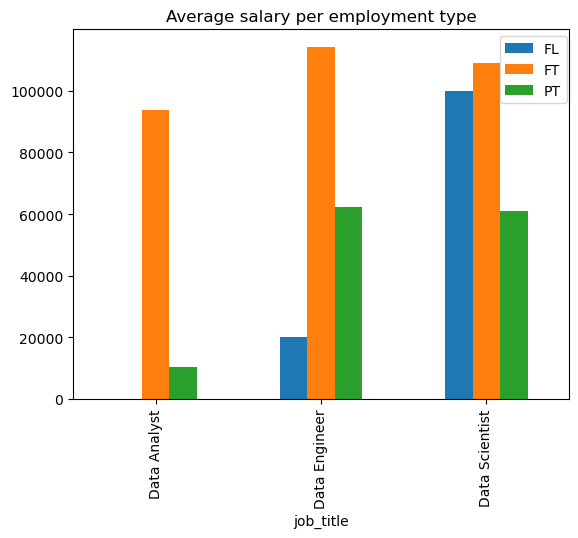

In [40]:
sal3.plot(kind='bar', stacked=False)
plt.legend(loc=(0.86,0.8))
plt.title('Average salary per employment type');

Freelancer data scientists earn an amount close to full time employees. while data engineers have huge payment gap between freelancers and full time employees. And there is no freelancers in Data Analyst position

Let's check the count of each title accoring to the company size

In [49]:
sz=data.pivot_table(index='company_size',columns='job_title', aggfunc='count').iloc[:,:3]
sz

company_location                             
job_title        Data Analyst Data Engineer Data Scientist
company_size                                              
L                          13            37             45
M                          76            89             77
S                           8             6             21

In [50]:
sz.columns=sz.columns.droplevel()

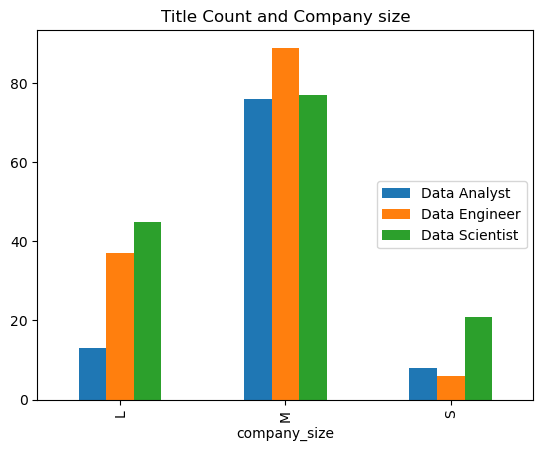

In [51]:
sz.plot(kind='bar', stacked=False)
plt.title('Title Count and Company size')
plt.legend(loc='right');

It seems that for small companies, data scientists have good hiring opportunities compared the other 2 titles. For large companies, data analysts opportunities seem to be small compared to Engineers and Scientists. In medium companies, the opportunities seem to be nearly similar for the 3 titles

Let's see the average salary changes according to company size

In [52]:
sal4=data.pivot_table(index='company_size',columns='job_title', aggfunc='mean', values='salary_in_usd').iloc[:,:3]
sal4

job_title,Data Analyst,Data Engineer,Data Scientist
company_size,,,
L,81777.615385,104255.972973,103313.355556
M,99545.342105,119372.741573,126380.753247
S,47759.000000,66342.500000,51925.761905


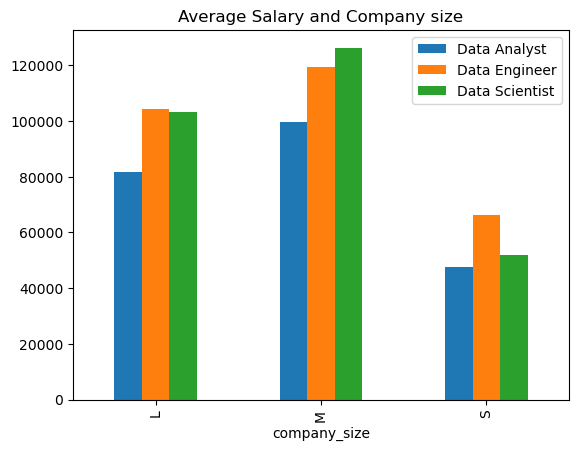

In [53]:
sal4.plot(kind='bar', stacked=False)
plt.title('Average Salary and Company size')
plt.legend(loc='upper right');

Medium size companies pay the highest salaries for all titles

Finally, let's investigate the remote_ratio

In [54]:
data['remote_ratio'].value_counts()

remote_ratio
100    242
0       87
50      43
Name: count, dtype: int64

In [55]:
rmt=data.pivot_table(index='job_title',columns='remote_ratio', aggfunc='count').iloc[:,:3]
rmt.columns= rmt.columns.droplevel()
rmt['sum']=rmt.sum(axis=1)
rmt

remote_ratio,0,50,100,sum
job_title,,,,
Data Analyst,21,6,70,97
Data Engineer,27,12,93,132
Data Scientist,39,25,79,143


In [56]:
rmt['0_%']= col_perc(rmt,rmt.columns[0])
rmt['50_%']= col_perc(rmt,rmt.columns[1])
rmt['100_%']= col_perc(rmt,rmt.columns[2])
rmt

remote_ratio,0,50,100,sum,0_%,50_%,100_%
job_title,,,,,,,
Data Analyst,21,6,70,97,0.22,0.06,0.72
Data Engineer,27,12,93,132,0.20,0.09,0.70
Data Scientist,39,25,79,143,0.27,0.17,0.55


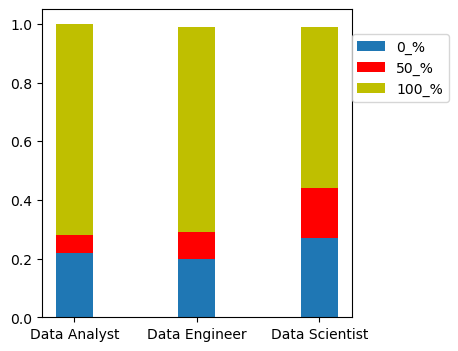

In [58]:
plt.figure(figsize=(4,4))
r1=rmt.iloc[:,4]
r2=rmt.iloc[:,5]
r3=rmt.iloc[:,6]

plt.bar(x= rmt.index, height=r1, width=0.3)
plt.bar(x=rmt.index , height= r2, bottom=r1, color='r', width=0.3)
plt.bar(x= rmt.index , height=r3, bottom=r1+r2, color='y', width=0.3)

plt.legend(rmt.columns[4:], loc=(1,0.7));

It seems that Data Scientists have the highest % of 0% (No remote work), so they tend to have more records of employees fully operating from company as compared to Engineers & Analysts, and they have higher % of 50% which gives them more flexibility, but still they have the lowest % of fully remote jobs

### Thank you